In [ ]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError
from urllib.error import URLError
import re
from urllib.parse import urljoin
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

El patrón en los URL's de las 50 páginas consiste en aumentar *_n_* en: **'../page-n.html'** donde *_n_* es el número de página.

In [ ]:
html = urlopen('https://books.toscrape.com/catalogue/page-1.html')
bs = BeautifulSoup(html.read(), 'html.parser')
print('\nPrint the markup beautifully:')
print(bs.prettify(formatter='html'))


Print the markup beautifully:
<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:30" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="../static/oscar/css/s

La información de interés está contenida en una etiqueta _'article'_ dentro de la clase *'product_pod'*

In [ ]:
book_info = bs.find(class_ = 'product_pod')
print(book_info.prettify(formatter='html'))

<article class="product_pod">
 <div class="image_container">
  <a href="a-light-in-the-attic_1000/index.html">
   <img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>
  </a>
 </div>
 <p class="star-rating Three">
  <i class="icon-star">
  </i>
  <i class="icon-star">
  </i>
  <i class="icon-star">
  </i>
  <i class="icon-star">
  </i>
  <i class="icon-star">
  </i>
 </p>
 <h3>
  <a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">
   A Light in the ...
  </a>
 </h3>
 <div class="product_price">
  <p class="price_color">
   &pound;51.77
  </p>
  <p class="instock availability">
   <i class="icon-ok">
   </i>
   In stock
  </p>
  <form>
   <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">
    Add to basket
   </button>
  </form>
 </div>
</article>



In [ ]:
def get_list(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None
    try:
        bsObj = BeautifulSoup(html.read(), "html.parser")
        booklist = bsObj.find_all('article', {'class':'product_pod'})
    except AttributeError as e:
        return None
    return booklist

In [ ]:
rating_map = {'One': 1,
         'Two': 2,
         'Three': 3,
         'Four': 4,
         'Five': 5}

In [ ]:
def get_data(bsObj, base_url):
    # Title
    title = bsObj.h3.a.get('title')
    # Price
    price = bsObj.find(class_ = 'price_color').text
    price = float(re.sub(r"[^\d.]", "", price))
    # Rating
    rating = rating_map.get(bsObj.find(class_ = re.compile(r'star-rating')).get('class')[1], 0)
    # Image URL
    relative_url = bsObj.find('img').get('src')
    base_url = base_url
    full_url = urljoin(base_url, relative_url)

    return title, price, rating, full_url

**Prueba de las funciones *get_list* y *get_data* antes de la fase final de _'Web Scraping'_**

In [ ]:
url = 'https://books.toscrape.com/catalogue/page-1.html'
beta_list = get_list(url)

In [ ]:
beta_list

[<article class="product_pod">
 <div class="image_container">
 <a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="../media/cache

In [ ]:
book1 = beta_list[0]
print(book1.prettify(formatter='html'))

<article class="product_pod">
 <div class="image_container">
  <a href="a-light-in-the-attic_1000/index.html">
   <img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>
  </a>
 </div>
 <p class="star-rating Three">
  <i class="icon-star">
  </i>
  <i class="icon-star">
  </i>
  <i class="icon-star">
  </i>
  <i class="icon-star">
  </i>
  <i class="icon-star">
  </i>
 </p>
 <h3>
  <a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">
   A Light in the ...
  </a>
 </h3>
 <div class="product_price">
  <p class="price_color">
   &pound;51.77
  </p>
  <p class="instock availability">
   <i class="icon-ok">
   </i>
   In stock
  </p>
  <form>
   <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">
    Add to basket
   </button>
  </form>
 </div>
</article>



In [ ]:
for data in get_data(book1, url):
    print(f"{data} (tipo de dato: {type(data)})")

A Light in the Attic (tipo de dato: <class 'str'>)
51.77 (tipo de dato: <class 'float'>)
3 (tipo de dato: <class 'int'>)
https://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg (tipo de dato: <class 'str'>)


In [ ]:
# Fase final
data = {'Title': [],
        'Price': [],
        'Rating': [],
        'Image_URL': []}

for i in range(1,51):
    url = (f"https://books.toscrape.com/catalogue/page-{i}.html")
    booklist = get_list(url)
    for book in booklist:
        title, price, rating, img_url = get_data(book, url)
        data['Title'].append(title)
        data['Price'].append(price)
        data['Rating'].append(rating)
        data['Image_URL'].append(img_url)

In [ ]:
booklist_df = pd.DataFrame(data)

In [ ]:
booklist_df.head()

,Title,Price,Rating,Image_URL
0,A Light in the Attic,51.77,3,https://books.toscrape.com/media/cache/2c/da/2...
1,Tipping the Velvet,53.74,1,https://books.toscrape.com/media/cache/26/0c/2...
2,Soumission,50.10,1,https://books.toscrape.com/media/cache/3e/ef/3...
3,Sharp Objects,47.82,4,https://books.toscrape.com/media/cache/32/51/3...
4,Sapiens: A Brief History of Humankind,54.23,5,https://books.toscrape.com/media/cache/be/a5/b...


In [ ]:
booklist_df[booklist_df['Title'] == 'The Star-Touched Queen']

,Title,Price,Rating,Image_URL
236,The Star-Touched Queen,46.02,5,https://books.toscrape.com/media/cache/53/5e/5...
358,The Star-Touched Queen,32.30,5,https://books.toscrape.com/media/cache/d3/0d/d...


Ordenar el dataframe original de acuerdo a la columna _'Price'_ en orden descendete

In [ ]:
booklist_df.sort_values(by='Price', ascending=False, inplace=True)

Verificar el tipo de dato de cada columna

In [ ]:
booklist_df.dtypes

Title         object
Price        float64
Rating         int64
Image_URL     object
dtype: object

Buscar si hay una correlación entre los precios y las valoraciones por medio de un diagrama de dispersión y coeficiente de

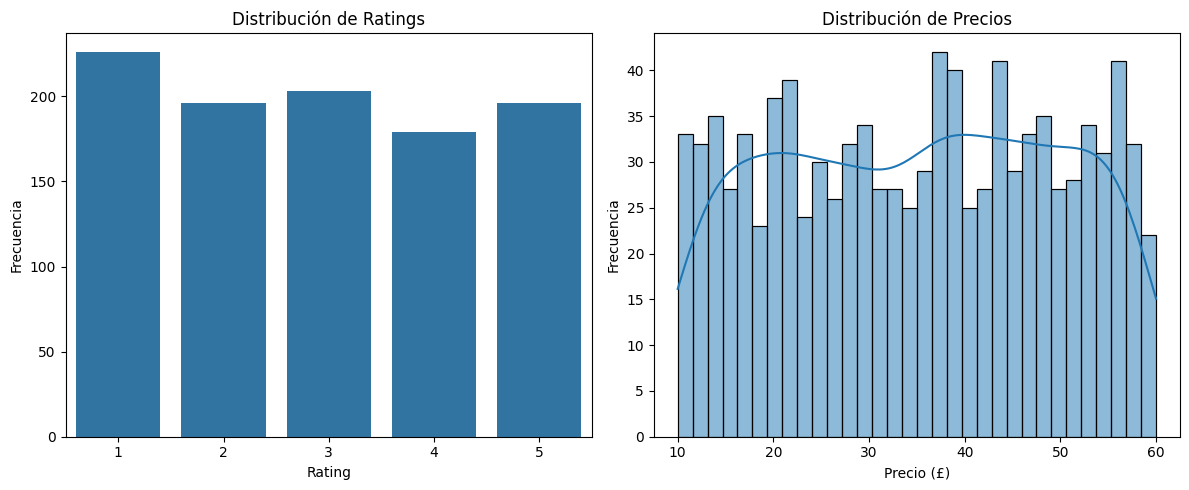

In [ ]:
# Crear figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras para rating
sns.countplot(x='Rating', data=booklist_df, ax=axes[0])
axes[0].set_title('Distribución de Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frecuencia')

# Histograma para precio
sns.histplot(data=booklist_df, x='Price', bins=32, kde=True, ax=axes[1])
axes[1].set_title('Distribución de Precios')
axes[1].set_xlabel('Precio (£)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [ ]:
# Cálculo del coeficiente de correlación de Spearman
corr, p_value = spearmanr(booklist_df['Price'], booklist_df['Rating'])

print(f"Coeficiente de correlación de Spearman: {corr}")
print(f"p-valor: {p_value}")

Coeficiente de correlación de Spearman: 0.02921568643020118
p-valor: 0.3560475336675232


De acuerdo al coeficiente de correlación de Spearman y al valor p obtenido, se concluye que no hay una relación estadísticamente significativa entre el precio y la valoración.

<Axes: xlabel='Rating', ylabel='Price'>

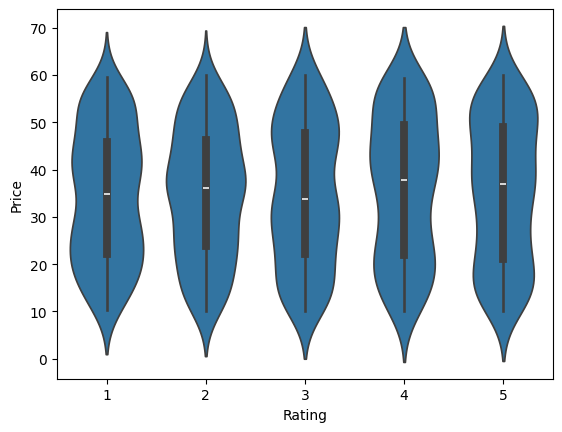

In [ ]:
sns.violinplot(x='Rating', y='Price', data=booklist_df)

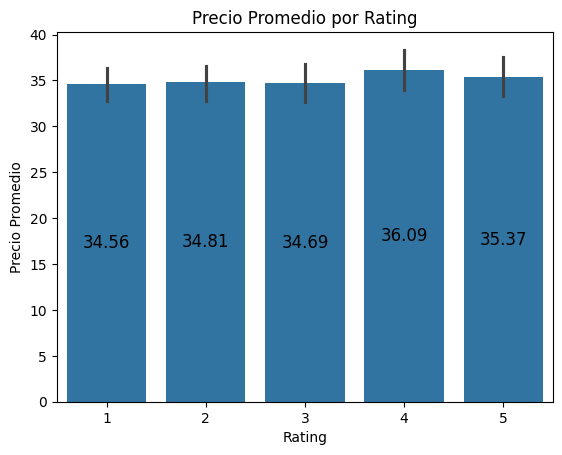

In [ ]:
ax = sns.barplot(x='Rating', y='Price', data=booklist_df, estimator='mean')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.),  # Ubicación dentro de la barra
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 0), textcoords='offset points')

plt.title('Precio Promedio por Rating')
plt.xlabel('Rating')
plt.ylabel('Precio Promedio')
plt.show()

**La gráfica muestra que el precio promedio según el rating es muy similar en todos los casos, lo que sugiere que no existe correlación monotónica entre el precio del libro y su valoración.**